## Tugas Kecil 2 IF3170 Inteligensi Buatan 
#### Exploratory Data Analysis

Anggota Kelompok

NIM | Nama |
--- | --- |
13521071 | Margaretha Olivia Haryono |
13521084 | Austin Gabriel Pardosi |

### Tahap Persiapan

Melakukan *import library* yang dibutuhkan untuk analisis, serta melakukan *load file* data yang diperlukan

##### Import Library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics
import math
import seaborn as sns

##### Load Data

In [3]:
df_train = pd.read_csv("data/data_train.csv")
display(df_train[:5])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


In [4]:
df_validation = pd.read_csv("data/data_validation.csv")
display(df_train[:5])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


1. Menuliskan statistik dasar

In [8]:
stats = df_train.describe()

stats.loc['median'] = df_train.median()
stats.loc['variance'] = df_train.var()
stats.loc['range'] = df_train.max() - df_train.min()
stats.loc['IQR'] = df_train.quantile(0.75) - df_train.quantile(0.25)
stats.loc['skewness'] = df_train.skew()
stats.loc['kurtosis'] = df_train.kurtosis()

stats

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1237.145714,0.493571,1.521714,0.502857,4.275000,0.530000,31.962143,0.507857,139.375714,4.481429,9.917143,643.177857,1251.717143,2.106731e+03,12.285714,5.665000,11.042143,0.760714,0.489286,0.495000,1.477857
std,430.051785,0.500137,0.814723,0.500171,4.324170,0.499278,18.162970,0.288539,35.400803,2.279836,6.080023,444.628980,428.982850,1.078347e+03,4.204198,4.372234,5.399052,0.426800,0.500064,0.500154,1.117575
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,2.560000e+02,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,864.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,108.000000,2.000000,5.000000,273.750000,876.500000,1.201000e+03,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1219.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,139.000000,4.000000,10.000000,561.000000,1247.000000,2.102000e+03,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.000000
75%,1602.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,169.000000,7.000000,15.000000,950.250000,1627.500000,3.035750e+03,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3.998000e+03,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000
median,1219.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,139.000000,4.000000,10.000000,561.000000,1247.000000,2.102000e+03,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.000000
variance,184944.537723,0.250137,0.663774,0.250171,18.698445,0.249278,329.893491,0.083255,1253.216851,5.197653,36.966682,197694.929745,184026.285910,1.162833e+06,17.675278,19.116430,29.149760,0.182158,0.250064,0.250154,1.248973


In [10]:
# modus
print("MODUS", end="\n\n")
for column in df_train:
    modus = df_train[column].mode()
    print(f'{column}', end='')
    for i in range(25 - len(column)):
        print(' ', end='')
    if (len(modus) != df_train.shape[0]):
        for i in range(len(modus)):
            if i != len(modus) - 1:
                print(modus[i], end=', ')
            else:
                print(modus[i])
    else:
        print("semua value (unik)")

MODUS

battery_power            772, 1068, 1330, 1872, 1949
blue                     0
clock_speed              0.5
dual_sim                 1
fc                       0
four_g                   1
int_memory               27
m_dep                    0.1
mobile_wt                182
n_cores                  4
pc                       10
px_height                88, 347, 526
px_width                 1247
ram                      1229, 3142
sc_h                     17
sc_w                     1
talk_time                15
three_g                  1
touch_screen             0
wifi                     0
price_range              0


2. <i>Duplicate value<i>

In [16]:
duplicates = df_train[df_train.duplicated()]
print("Jumlah data duplikat:", len(duplicates))

Jumlah data duplikat: 0


3. <i>Missing value<i>

In [18]:
missing_values = df_train.isnull().sum()

print("Jumlah missing value untuk setiap kolom:")
print(missing_values)

Jumlah missing value untuk setiap kolom:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


4. <i>Outlier<i>

In [29]:
z_scores = stats.zscore(df_train)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
outlier_rows = df_train[outliers]
outlier_rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
53,1290,1,1.4,1,19,1,35,0.3,110,4,20,405,742,879,16,2,8,1,0,0,0
98,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1
603,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
778,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1035,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
1072,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
1150,695,0,0.5,0,18,1,12,0.6,196,2,19,1649,1829,2855,16,13,7,1,1,1,2
1232,1957,0,1.2,1,18,1,36,0.8,151,2,19,1194,1727,1115,16,2,18,1,0,1,1


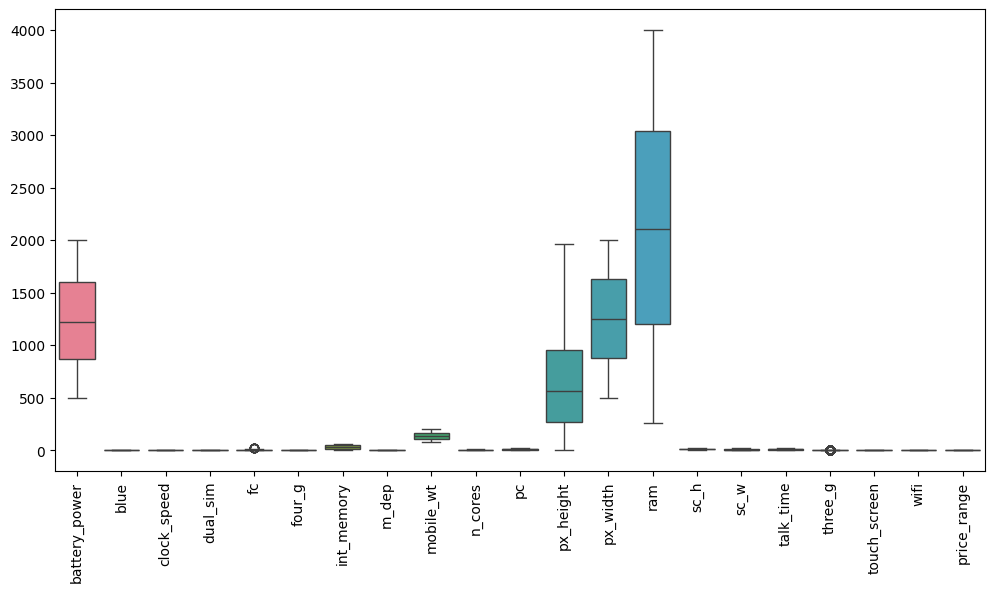

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train)
plt.xticks(rotation=90)
plt.show()